In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Cargar archivo csv desde seaborn
df= pd.read_csv('Mexico_Entire-Home-Apt.csv')
df.head(5)

Unnamed: 0.1  Unnamed: 0                          listing_url last_scraped  \
0             0           0   https://www.airbnb.com/rooms/35797   2024-09-25   
1             1           1   https://www.airbnb.com/rooms/44616   2024-09-26   
2             2           2   https://www.airbnb.com/rooms/67703   2024-09-26   
3             3           3   https://www.airbnb.com/rooms/70644   2024-09-25   
4             4           4  https://www.airbnb.com/rooms/107078   2024-09-25   

                                         description  \
0  Dentro de Villa un estudio de arte con futon, ...   
1  A new concept of hosting in mexico through a b...   
2  Comfortably furnished, sunny, 2 bedroom apt., ...   
3  COYOACAN designer studio quiet & safe! well eq...   
4  Is the best ever place triple L <br />Location...   

                                   host_url  host_since  host_response_time  \
0  https://www.airbnb.com/users/show/153786  2010-06-28  a few days or more   
1  https://www.airbnb.com/users/show/196253  2010-08-09      within an hour   
2  https://www.airbnb.com/users/show/334451  2011-01-04      within an hour   
3  https://www.airbnb.com/users/show/212109  2010-08-24  within a few hours   
4  https://www.airbnb.com/users/show/540705  2011-04-27      within an hour   

  host_response_rate              host_acceptance_rate  ...  \
0                 0%  No contiene host_acceptance_rate  ...   
1               100%                               93%  ...   
2                71%                               57%  ...   
3               100%                              100%  ...   
4               100%                              100%  ...   

  review_scores_accuracy review_scores_cleanliness review_scores_checkin  \
0                   4.79                      4.76                  4.84   
1                   4.88                      4.70                  4.87   
2                   4.81                      4.75                  4.94   
3                   4.90                      4.96                  4.96   
4                   5.00                      5.00                  5.00   

  review_scores_communication review_scores_location  \
0                        4.83                   4.85   
1                        4.78                   4.98   
2                        4.92                   4.98   
3                        4.98                   4.96   
4                        4.92                   4.91   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                            1.0                                         1.0   
1                            8.0                                         4.0   
2                            2.0                                         2.0   
3                            3.0                                         2.0   
4                            3.0                                         3.0   

  calculated_host_listings_count_private_rooms  \
0                                          0.0   
1                                          1.0   
2                                          0.0   
3                                          1.0   
4                                          0.0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                         0.0              1.74  
1                                         0.0              0.41  
2                                         0.0              0.31  
3                                         0.0              0.83  
4                                         0.0              0.11  

[5 rows x 52 columns]

In [3]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "host_acceptance_rate"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_acceptance_rate',y='price',color='blue',data=df)
sns.scatterplot(x='host_identity_verified',y='price',color='red',data=df)

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

In [4]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_acceptance_rate']]
Var_Dep = df['price']

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [6]:
type(model)

sklearn.linear_model._base.LinearRegression

In [7]:
# Reemplazar valores faltantes y convertir a número
df["host_acceptance_rate"] = df["host_acceptance_rate"].astype(str)  # Convertir todo a string
df["host_acceptance_rate"] = df["host_acceptance_rate"].replace("No contiene host_acceptance_rate", "0%")
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.rstrip("%").astype(float) / 100  # Eliminar "%" y convertir a float

# Verificar que ahora sean valores numéricos
print(df["host_acceptance_rate"].dtype)  # Debe ser float

# Asegurar que las variables independientes sean numéricas
Vars_Indep = df[["host_acceptance_rate"]]  # Agregar otras variables aquí
Var_Dep = df["price"]  # Variable dependiente

# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

float64


LinearRegression()

In [8]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([407.0808413]),
 'rank_': 1,
 'singular_': array([41.76768068]),
 'intercept_': 787.153830444113}

In [9]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.0415762338794452

In [10]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_acceptance_rate']])
y_predic

array([ 787.15383044, 1165.73901285, 1019.18990998, ...,  787.15383044,
       1194.23467174, 1194.23467174])

In [11]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones', y_predic)
df

Predicciones  Unnamed: 0.1  Unnamed: 0  \
0        787.153830             0           0   
1       1165.739013             1           1   
2       1019.189910             2           2   
3       1194.234672             3           3   
4       1194.234672             4           4   
...             ...           ...         ...   
17358    787.153830         26572       26572   
17359    787.153830         26573       26573   
17360    787.153830         26574       26574   
17361   1194.234672         26575       26575   
17362   1194.234672         26581       26581   

                                            listing_url last_scraped  \
0                    https://www.airbnb.com/rooms/35797   2024-09-25   
1                    https://www.airbnb.com/rooms/44616   2024-09-26   
2                    https://www.airbnb.com/rooms/67703   2024-09-26   
3                    https://www.airbnb.com/rooms/70644   2024-09-25   
4                   https://www.airbnb.com/rooms/107078   2024-09-25   
...                                                 ...          ...   
17358  https://www.airbnb.com/rooms/1251627039124173262   2024-09-25   
17359  https://www.airbnb.com/rooms/1251642490491185216   2024-09-25   
17360  https://www.airbnb.com/rooms/1251769567383709085   2024-09-25   
17361  https://www.airbnb.com/rooms/1251800961446133530   2024-09-26   
17362  https://www.airbnb.com/rooms/1252229157495978163   2024-09-25   

                                             description  \
0      Dentro de Villa un estudio de arte con futon, ...   
1      A new concept of hosting in mexico through a b...   
2      Comfortably furnished, sunny, 2 bedroom apt., ...   
3      COYOACAN designer studio quiet & safe! well eq...   
4      Is the best ever place triple L <br />Location...   
...                                                  ...   
17358  Have fun with the whole family at this stylish...   
17359  This unique place has its own style. Located i...   
17360  Apartment with 1 bedroom and queen size bed, k...   
17361  Discover a refined urban escape in Polanco wit...   
17362  Known as New Polanco, the Granada colony has p...   

                                          host_url  host_since  \
0         https://www.airbnb.com/users/show/153786  2010-06-28   
1         https://www.airbnb.com/users/show/196253  2010-08-09   
2         https://www.airbnb.com/users/show/334451  2011-01-04   
3         https://www.airbnb.com/users/show/212109  2010-08-24   
4         https://www.airbnb.com/users/show/540705  2011-04-27   
...                                            ...         ...   
17358  https://www.airbnb.com/users/show/653494962  2024-09-22   
17359  https://www.airbnb.com/users/show/652781543  2024-09-18   
17360  https://www.airbnb.com/users/show/376814072  2020-11-24   
17361  https://www.airbnb.com/users/show/237937785  2019-01-20   
17362    https://www.airbnb.com/users/show/6522855  2013-05-22   

       host_response_time              host_response_rate  ...  \
0      a few days or more                              0%  ...   
1          within an hour                            100%  ...   
2          within an hour                             71%  ...   
3      within a few hours                            100%  ...   
4          within an hour                            100%  ...   
...                   ...                             ...  ...   
17358      within an hour  No contiene host_response_rate  ...   
17359      within an hour  No contiene host_response_rate  ...   
17360      within an hour  No contiene host_response_rate  ...   
17361      within an hour                            100%  ...   
17362      within an hour                            100%  ...   

       review_scores_accuracy review_scores_cleanliness review_scores_checkin  \
0                        4.79                      4.76                  4.84   
1                        4.88                      4.70                  4.87   
2  

In [12]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate',y='price',color='blue',data = df)
sns.scatterplot(x='host_acceptance_rate',y='Predicciones',color='red',data = df)

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

In [13]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.0415762338794452

In [14]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.20390251072374072

In [15]:
df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 2})


C:\Users\joker\AppData\Local\Temp\ipykernel_8480\68322890.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 2})


In [16]:
df['room_type'] = 1

In [17]:
df = df[['price', 'host_is_superhost', 'host_acceptance_rate', 'room_type', 
         'accommodates', 'bathrooms', 'review_scores_cleanliness', 
         'host_identity_verified', 'instant_bookable']]

C:\Users\joker\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\joker\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\joker\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values t

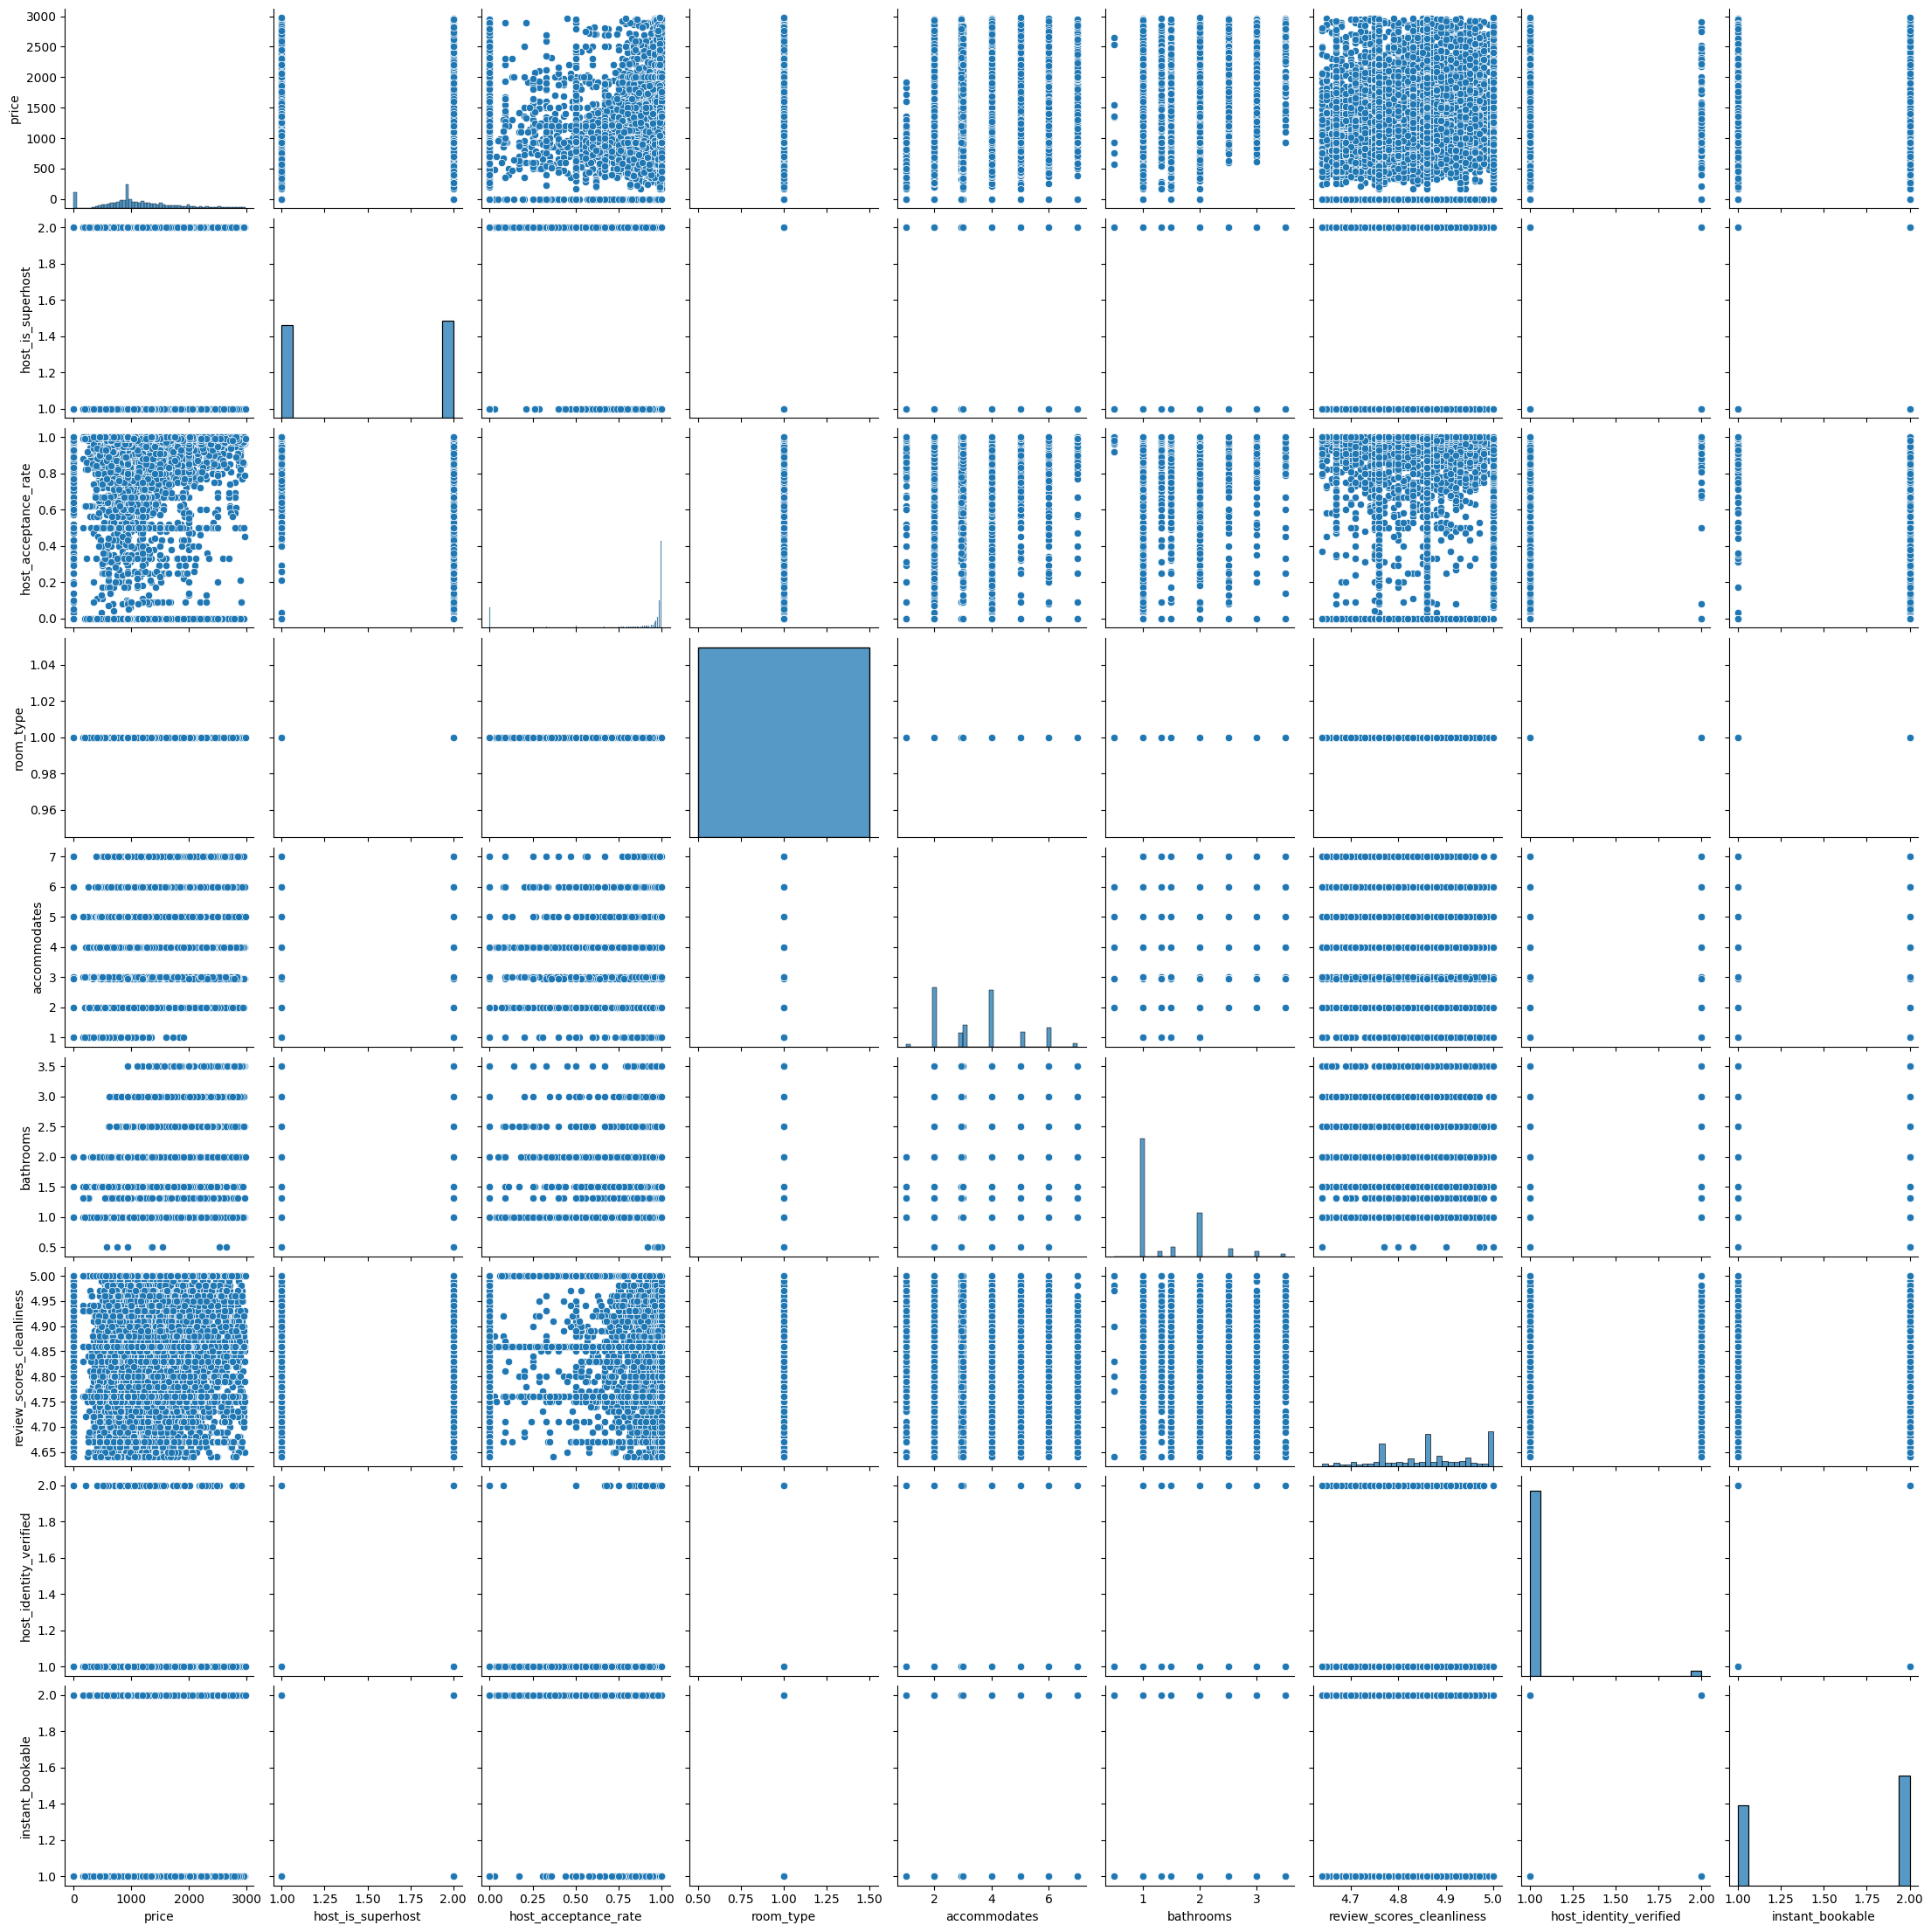

In [18]:
#Graficamos todas las disperciones
sns.pairplot(df)

In [19]:
# Calcular nuevamente las correlaciones
Corr_Factors = df.corr()
Corr_Factors

price  host_is_superhost  host_acceptance_rate  \
price                      1.000000          -0.124232              0.203903   
host_is_superhost         -0.124232           1.000000             -0.364659   
host_acceptance_rate       0.203903          -0.364659              1.000000   
room_type                       NaN                NaN                   NaN   
accommodates               0.194701          -0.033876              0.032829   
bathrooms                  0.388683          -0.070521              0.045363   
review_scores_cleanliness  0.071175          -0.137384              0.078985   
host_identity_verified    -0.154529           0.095419             -0.232761   
instant_bookable          -0.143512           0.061598             -0.287231   

                           room_type  accommodates  bathrooms  \
price                            NaN      0.194701   0.388683   
host_is_superhost                NaN     -0.033876  -0.070521   
host_acceptance_rate             NaN      0.032829   0.045363   
room_type                        NaN           NaN        NaN   
accommodates                     NaN      1.000000   0.421591   
bathrooms                        NaN      0.421591   1.000000   
review_scores_cleanliness        NaN      0.006209   0.027776   
host_identity_verified           NaN     -0.019897  -0.068063   
instant_bookable                 NaN      0.009469  -0.014264   

                           review_scores_cleanliness  host_identity_verified  \
price                                       0.071175               -0.154529   
host_is_superhost                          -0.137384                0.095419   
host_acceptance_rate                        0.078985               -0.232761   
room_type                                        NaN                     NaN   
accommodates                                0.006209               -0.019897   
bathrooms                                   0.027776               -0.068063   
review_scores_cleanliness                   1.000000               -0.046474   
host_identity_verified                     -0.046474                1.000000   
instant_bookable                            0.037176                0.069063   

                           instant_bookable  
price                             -0.143512  
host_is_superhost                  0.061598  
host_acceptance_rate              -0.287231  
room_type                               NaN  
accommodates                       0.009469  
bathrooms                         -0.014264  
review_scores_cleanliness          0.037176  
host_identity_verified             0.069063  
instant_bookable                   1.000000

In [20]:
#Encontramos el valor absoluto de las todas correlaciones
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

price  host_is_superhost  host_acceptance_rate  \
price                      1.000000           0.124232              0.203903   
host_is_superhost          0.124232           1.000000              0.364659   
host_acceptance_rate       0.203903           0.364659              1.000000   
room_type                       NaN                NaN                   NaN   
accommodates               0.194701           0.033876              0.032829   
bathrooms                  0.388683           0.070521              0.045363   
review_scores_cleanliness  0.071175           0.137384              0.078985   
host_identity_verified     0.154529           0.095419              0.232761   
instant_bookable           0.143512           0.061598              0.287231   

                           room_type  accommodates  bathrooms  \
price                            NaN      0.194701   0.388683   
host_is_superhost                NaN      0.033876   0.070521   
host_acceptance_rate             NaN      0.032829   0.045363   
room_type                        NaN           NaN        NaN   
accommodates                     NaN      1.000000   0.421591   
bathrooms                        NaN      0.421591   1.000000   
review_scores_cleanliness        NaN      0.006209   0.027776   
host_identity_verified           NaN      0.019897   0.068063   
instant_bookable                 NaN      0.009469   0.014264   

                           review_scores_cleanliness  host_identity_verified  \
price                                       0.071175                0.154529   
host_is_superhost                           0.137384                0.095419   
host_acceptance_rate                        0.078985                0.232761   
room_type                                        NaN                     NaN   
accommodates                                0.006209                0.019897   
bathrooms                                   0.027776                0.068063   
review_scores_cleanliness                   1.000000                0.046474   
host_identity_verified                      0.046474                1.000000   
instant_bookable                            0.037176                0.069063   

                           instant_bookable  
price                              0.143512  
host_is_superhost                  0.061598  
host_acceptance_rate               0.287231  
room_type                               NaN  
accommodates                       0.009469  
bathrooms                          0.014264  
review_scores_cleanliness          0.037176  
host_identity_verified             0.069063  
instant_bookable                   1.000000

C:\Users\joker\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

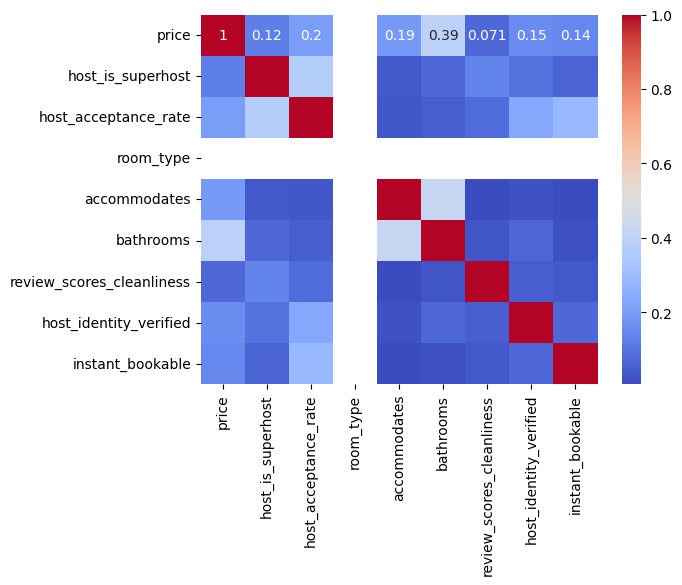

In [21]:
#Mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, annot=True, cmap='coolwarm')
Heat_Map

In [22]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap = 'Reds', annot=True, fmt=".2f")

C:\Users\joker\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Price Vs Host is Superhost

<Axes: xlabel='host_is_superhost', ylabel='price'>

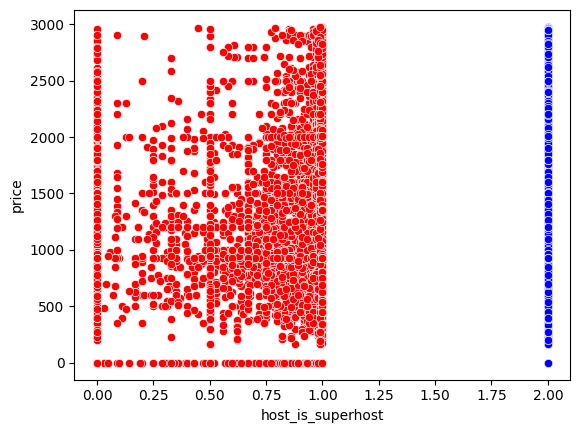

In [23]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "host_is_superhost"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_is_superhost',y='price',color='blue',data=df)
sns.scatterplot(x='host_acceptance_rate',y='price',color='red',data=df)

In [25]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_is_superhost']]
Var_Dep = df['price']

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [27]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [28]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-157.26678612]),
 'rank_': 1,
 'singular_': array([65.87105781]),
 'intercept_': 1369.9867226392262}

In [29]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.01543357010693358

In [30]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_is_superhost']])
y_predic

array([1055.45315041, 1212.71993652, 1212.71993652, ..., 1055.45315041,
       1212.71993652, 1212.71993652])

In [31]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones', y_predic)
df

Predicciones   price  host_is_superhost  host_acceptance_rate  \
0       1055.453150   932.7                  2                  0.00   
1       1212.719937     0.0                  1                  0.93   
2       1212.719937  2029.0                  1                  0.57   
3       1212.719937  1140.0                  1                  1.00   
4       1212.719937   932.7                  1                  1.00   
...             ...     ...                ...                   ...   
17358   1055.453150   700.0                  2                  0.00   
17359   1055.453150  1900.0                  2                  0.00   
17360   1055.453150  1200.0                  2                  0.00   
17361   1212.719937  1358.0                  1                  1.00   
17362   1212.719937  1353.0                  1                  1.00   

       room_type  accommodates  bathrooms  review_scores_cleanliness  \
0              1          2.00        1.0                       4.76   
1              1          2.94        1.0                       4.70   
2              1          4.00        1.0                       4.75   
3              1          2.00        1.0                       4.96   
4              1          2.00        1.5                       5.00   
...          ...           ...        ...                        ...   
17358          1          4.00        1.0                       4.76   
17359          1          4.00        2.0                       4.76   
17360          1          2.00        1.0                       4.76   
17361          1          3.00        1.0                       4.76   
17362          1          2.00        1.0                       4.76   

       host_identity_verified  instant_bookable  
0                           1                 2  
1                           1                 2  
2                           1                 2  
3                           1                 2  
4                           1                 2  
...                       ...               ...  
17358                       1                 2  
17359                       1                 2  
17360                       1                 2  
17361                       1                 1  
17362                       1                 1  

[17363 rows x 10 columns]

<Axes: xlabel='host_is_superhost', ylabel='price'>

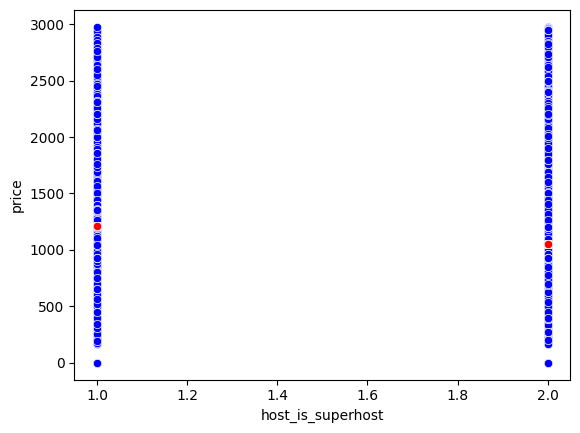

In [32]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='host_is_superhost',y='price',color='blue',data = df)
sns.scatterplot(x='host_is_superhost',y='Predicciones',color='red',data = df)

In [33]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.01543357010693358

In [34]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.12423192064414677

Accomodates Vs Bathrooms

<Axes: xlabel='bathrooms', ylabel='price'>

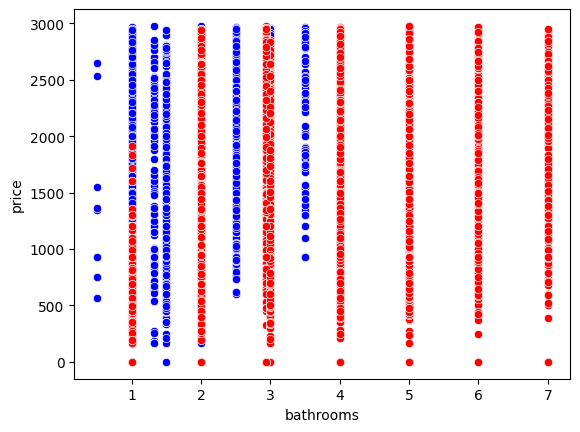

In [35]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "bathrooms"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='bathrooms',y='price',color='blue',data=df)
sns.scatterplot(x='accommodates',y='price',color='red',data=df)

In [36]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['bathrooms']]
Var_Dep = df['price']

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [38]:
type(model)

sklearn.linear_model._base.LinearRegression

In [39]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [40]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([417.39457498]),
 'rank_': 1,
 'singular_': array([77.65098831]),
 'intercept_': 548.4641784512286}

In [41]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.15107432959748468

In [42]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['bathrooms']])
y_predic

array([965.85875343, 965.85875343, 965.85875343, ..., 965.85875343,
       965.85875343, 965.85875343])

In [43]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones2', y_predic)
df

Predicciones2  Predicciones   price  host_is_superhost  \
0         965.858753   1055.453150   932.7                  2   
1         965.858753   1212.719937     0.0                  1   
2         965.858753   1212.719937  2029.0                  1   
3         965.858753   1212.719937  1140.0                  1   
4        1174.556041   1212.719937   932.7                  1   
...              ...           ...     ...                ...   
17358     965.858753   1055.453150   700.0                  2   
17359    1383.253328   1055.453150  1900.0                  2   
17360     965.858753   1055.453150  1200.0                  2   
17361     965.858753   1212.719937  1358.0                  1   
17362     965.858753   1212.719937  1353.0                  1   

       host_acceptance_rate  room_type  accommodates  bathrooms  \
0                      0.00          1          2.00        1.0   
1                      0.93          1          2.94        1.0   
2                      0.57          1          4.00        1.0   
3                      1.00          1          2.00        1.0   
4                      1.00          1          2.00        1.5   
...                     ...        ...           ...        ...   
17358                  0.00          1          4.00        1.0   
17359                  0.00          1          4.00        2.0   
17360                  0.00          1          2.00        1.0   
17361                  1.00          1          3.00        1.0   
17362                  1.00          1          2.00        1.0   

       review_scores_cleanliness  host_identity_verified  instant_bookable  
0                           4.76                       1                 2  
1                           4.70                       1                 2  
2                           4.75                       1                 2  
3                           4.96                       1                 2  
4                           5.00                       1                 2  
...                          ...                     ...               ...  
17358                       4.76                       1                 2  
17359                       4.76                       1                 2  
17360                       4.76                       1                 2  
17361                       4.76                       1                 1  
17362                       4.76                       1                 1  

[17363 rows x 11 columns]

<Axes: xlabel='bathrooms', ylabel='price'>

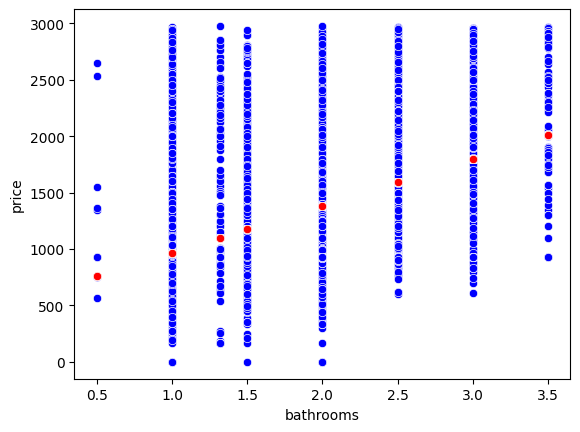

In [44]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='bathrooms',y='price',color='blue',data = df)
sns.scatterplot(x='bathrooms',y='Predicciones2',color='red',data = df)

In [45]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.15107432959748468

In [46]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.38868281361218515

Review_scores_cleanliness vs price

In [49]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "alcohol"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='review_scores_cleanliness',y='price',color='blue',data=df)
sns.scatterplot(x='host_is_superhost',y='price',color='red',data=df)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

In [50]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['review_scores_cleanliness']]
Var_Dep = df['price']

In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [52]:
type(model)

sklearn.linear_model._base.LinearRegression

In [53]:

# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [54]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([463.71521398]),
 'rank_': 1,
 'singular_': array([12.7989649]),
 'intercept_': -1122.5336388086941}

In [55]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.005065886858989788

In [56]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['review_scores_cleanliness']])
y_predic

array([1084.75077975, 1056.92786691, 1080.11362761, ..., 1084.75077975,
       1084.75077975, 1084.75077975])

In [57]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones3', y_predic)
df

Predicciones3  Predicciones2  Predicciones   price  host_is_superhost  \
0        1084.750780     965.858753   1055.453150   932.7                  2   
1        1056.927867     965.858753   1212.719937     0.0                  1   
2        1080.113628     965.858753   1212.719937  2029.0                  1   
3        1177.493823     965.858753   1212.719937  1140.0                  1   
4        1196.042431    1174.556041   1212.719937   932.7                  1   
...              ...            ...           ...     ...                ...   
17358    1084.750780     965.858753   1055.453150   700.0                  2   
17359    1084.750780    1383.253328   1055.453150  1900.0                  2   
17360    1084.750780     965.858753   1055.453150  1200.0                  2   
17361    1084.750780     965.858753   1212.719937  1358.0                  1   
17362    1084.750780     965.858753   1212.719937  1353.0                  1   

       host_acceptance_rate  room_type  accommodates  bathrooms  \
0                      0.00          1          2.00        1.0   
1                      0.93          1          2.94        1.0   
2                      0.57          1          4.00        1.0   
3                      1.00          1          2.00        1.0   
4                      1.00          1          2.00        1.5   
...                     ...        ...           ...        ...   
17358                  0.00          1          4.00        1.0   
17359                  0.00          1          4.00        2.0   
17360                  0.00          1          2.00        1.0   
17361                  1.00          1          3.00        1.0   
17362                  1.00          1          2.00        1.0   

       review_scores_cleanliness  host_identity_verified  instant_bookable  
0                           4.76                       1                 2  
1                           4.70                       1                 2  
2                           4.75                       1                 2  
3                           4.96                       1                 2  
4                           5.00                       1                 2  
...                          ...                     ...               ...  
17358                       4.76                       1                 2  
17359                       4.76                       1                 2  
17360                       4.76                       1                 2  
17361                       4.76                       1                 1  
17362                       4.76                       1                 1  

[17363 rows x 12 columns]

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

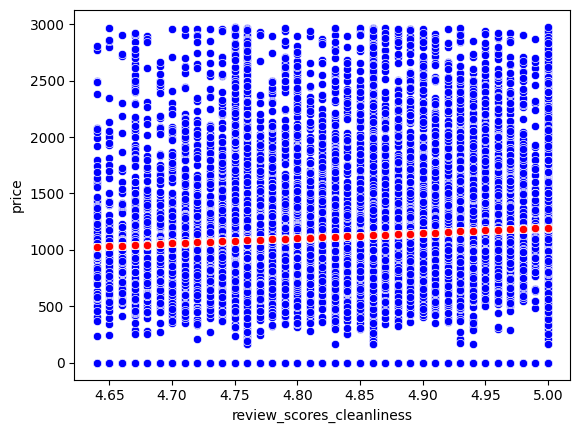

In [58]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='review_scores_cleanliness',y='price',color='blue',data = df)
sns.scatterplot(x='review_scores_cleanliness',y='Predicciones3',color='red',data = df)

In [59]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.005065886858989788

In [60]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.07117504379338159

preice vs host identity verified

<Axes: xlabel='host_identity_verified', ylabel='price'>

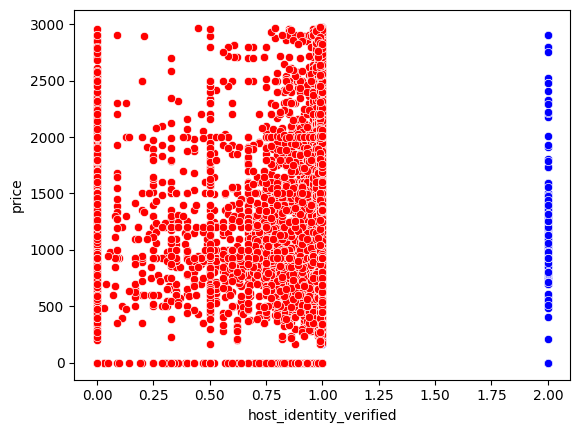

In [61]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "alcohol"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_identity_verified',y='price',color='blue',data=df)
sns.scatterplot(x='host_acceptance_rate',y='price',color='red',data=df)

In [62]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_identity_verified']]
Var_Dep = df['price']

In [63]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [64]:
type(model)

sklearn.linear_model._base.LinearRegression

In [65]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)


LinearRegression()

In [66]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-627.11573177]),
 'rank_': 1,
 'singular_': array([20.54754994]),
 'intercept_': 1775.2607937861171}

In [67]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.023879134439843686

In [68]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_identity_verified']])
y_predic

array([1148.14506202, 1148.14506202, 1148.14506202, ..., 1148.14506202,
       1148.14506202, 1148.14506202])

In [69]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones4', y_predic)
df

Predicciones4  Predicciones3  Predicciones2  Predicciones   price  \
0        1148.145062    1084.750780     965.858753   1055.453150   932.7   
1        1148.145062    1056.927867     965.858753   1212.719937     0.0   
2        1148.145062    1080.113628     965.858753   1212.719937  2029.0   
3        1148.145062    1177.493823     965.858753   1212.719937  1140.0   
4        1148.145062    1196.042431    1174.556041   1212.719937   932.7   
...              ...            ...            ...           ...     ...   
17358    1148.145062    1084.750780     965.858753   1055.453150   700.0   
17359    1148.145062    1084.750780    1383.253328   1055.453150  1900.0   
17360    1148.145062    1084.750780     965.858753   1055.453150  1200.0   
17361    1148.145062    1084.750780     965.858753   1212.719937  1358.0   
17362    1148.145062    1084.750780     965.858753   1212.719937  1353.0   

       host_is_superhost  host_acceptance_rate  room_type  accommodates  \
0                      2                  0.00          1          2.00   
1                      1                  0.93          1          2.94   
2                      1                  0.57          1          4.00   
3                      1                  1.00          1          2.00   
4                      1                  1.00          1          2.00   
...                  ...                   ...        ...           ...   
17358                  2                  0.00          1          4.00   
17359                  2                  0.00          1          4.00   
17360                  2                  0.00          1          2.00   
17361                  1                  1.00          1          3.00   
17362                  1                  1.00          1          2.00   

       bathrooms  review_scores_cleanliness  host_identity_verified  \
0            1.0                       4.76                       1   
1            1.0                       4.70                       1   
2            1.0                       4.75                       1   
3            1.0                       4.96                       1   
4            1.5                       5.00                       1   
...          ...                        ...                     ...   
17358        1.0                       4.76                       1   
17359        2.0                       4.76                       1   
17360        1.0                       4.76                       1   
17361        1.0                       4.76                       1   
17362        1.0                       4.76                       1   

       instant_bookable  
0                     2  
1                     2  
2                     2  
3                     2  
4                     2  
...                 ...  
17358                 2  
17359                 2  
17360                 2  
17361                 1  
17362                 1  

[17363 rows x 13 columns]

In [70]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='host_identity_verified',y='price',color='blue',data = df)
sns.scatterplot(x='host_identity_verified',y='Predicciones3',color='red',data = df)

<Axes: xlabel='host_identity_verified', ylabel='price'>

In [71]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.023879134439843686

In [72]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.1545287495576266

price vs instant bookable

In [73]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "instant_bookable"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='instant_bookable',y='price',color='blue',data=df)
sns.scatterplot(x='host_identity_verified',y='price',color='red',data=df)

<Axes: xlabel='instant_bookable', ylabel='price'>

In [75]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['instant_bookable']]
Var_Dep = df['price']

In [76]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [77]:
type(model)

sklearn.linear_model._base.LinearRegression

In [78]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-183.94368926]),
 'rank_': 1,
 'singular_': array([65.05823086]),
 'intercept_': 1422.9406117038407}

In [80]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.020595739214988362

In [81]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['instant_bookable']])
y_predic

array([1055.05323319, 1055.05323319, 1055.05323319, ..., 1055.05323319,
       1238.99692245, 1238.99692245])

In [82]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones5', y_predic)
df

Predicciones5  Predicciones4  Predicciones3  Predicciones2  \
0        1055.053233    1148.145062    1084.750780     965.858753   
1        1055.053233    1148.145062    1056.927867     965.858753   
2        1055.053233    1148.145062    1080.113628     965.858753   
3        1055.053233    1148.145062    1177.493823     965.858753   
4        1055.053233    1148.145062    1196.042431    1174.556041   
...              ...            ...            ...            ...   
17358    1055.053233    1148.145062    1084.750780     965.858753   
17359    1055.053233    1148.145062    1084.750780    1383.253328   
17360    1055.053233    1148.145062    1084.750780     965.858753   
17361    1238.996922    1148.145062    1084.750780     965.858753   
17362    1238.996922    1148.145062    1084.750780     965.858753   

       Predicciones   price  host_is_superhost  host_acceptance_rate  \
0       1055.453150   932.7                  2                  0.00   
1       1212.719937     0.0                  1                  0.93   
2       1212.719937  2029.0                  1                  0.57   
3       1212.719937  1140.0                  1                  1.00   
4       1212.719937   932.7                  1                  1.00   
...             ...     ...                ...                   ...   
17358   1055.453150   700.0                  2                  0.00   
17359   1055.453150  1900.0                  2                  0.00   
17360   1055.453150  1200.0                  2                  0.00   
17361   1212.719937  1358.0                  1                  1.00   
17362   1212.719937  1353.0                  1                  1.00   

       room_type  accommodates  bathrooms  review_scores_cleanliness  \
0              1          2.00        1.0                       4.76   
1              1          2.94        1.0                       4.70   
2              1          4.00        1.0                       4.75   
3              1          2.00        1.0                       4.96   
4              1          2.00        1.5                       5.00   
...          ...           ...        ...                        ...   
17358          1          4.00        1.0                       4.76   
17359          1          4.00        2.0                       4.76   
17360          1          2.00        1.0                       4.76   
17361          1          3.00        1.0                       4.76   
17362          1          2.00        1.0                       4.76   

       host_identity_verified  instant_bookable  
0                           1                 2  
1                           1                 2  
2                           1                 2  
3                           1                 2  
4                           1                 2  
...                       ...               ...  
17358                       1                 2  
17359                       1                 2  
17360                       1                 2  
17361                       1                 1  
17362                       1                 1  

[17363 rows x 14 columns]

<Axes: xlabel='instant_bookable', ylabel='price'>

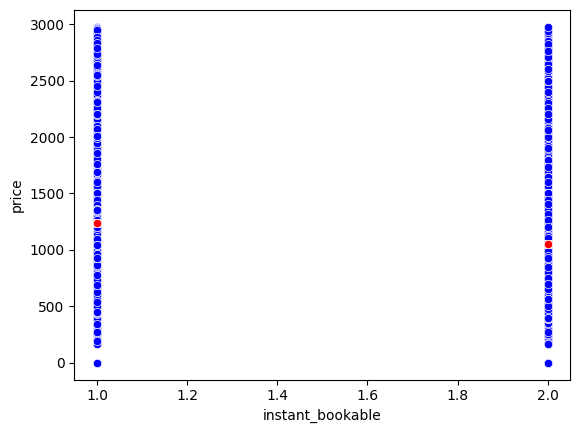

In [83]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='instant_bookable',y='price',color='blue',data = df)
sns.scatterplot(x='instant_bookable',y='Predicciones5',color='red',data = df)

In [84]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.020595739214988362

In [85]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.14351215702855408